ipykernel_launcher:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


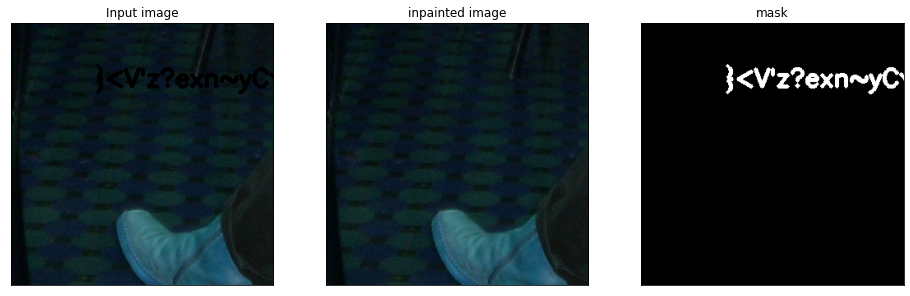

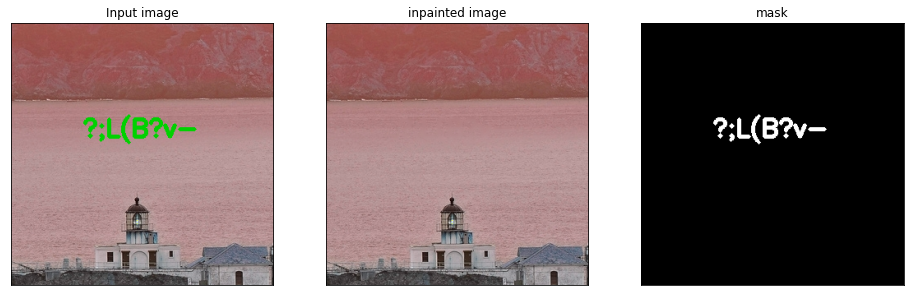

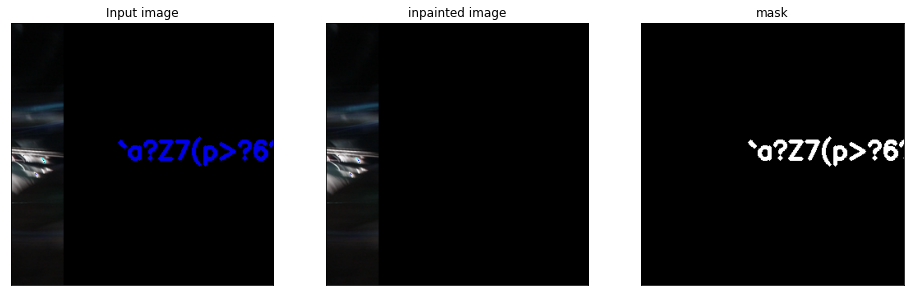

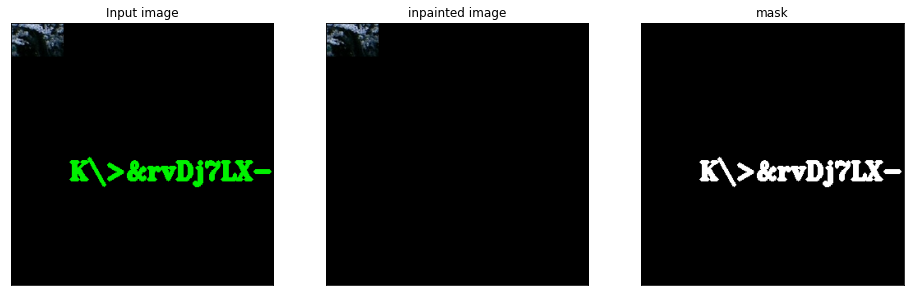

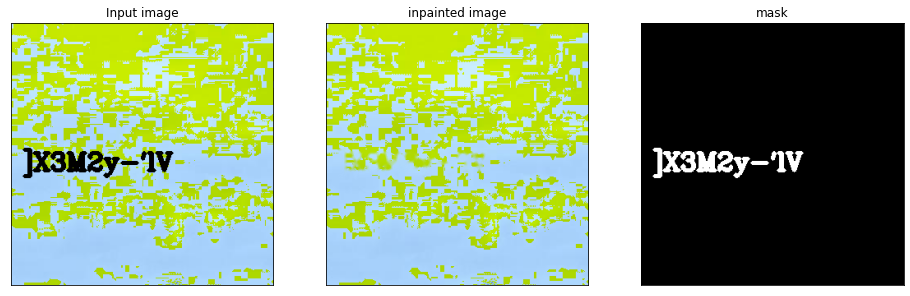

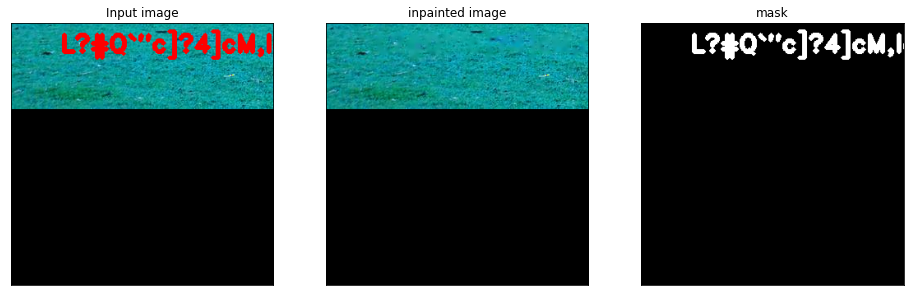

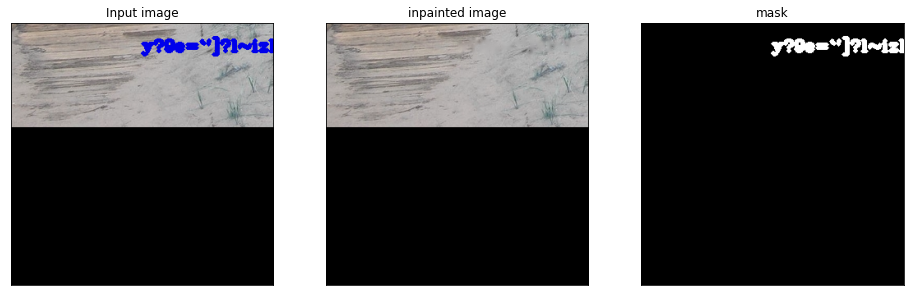

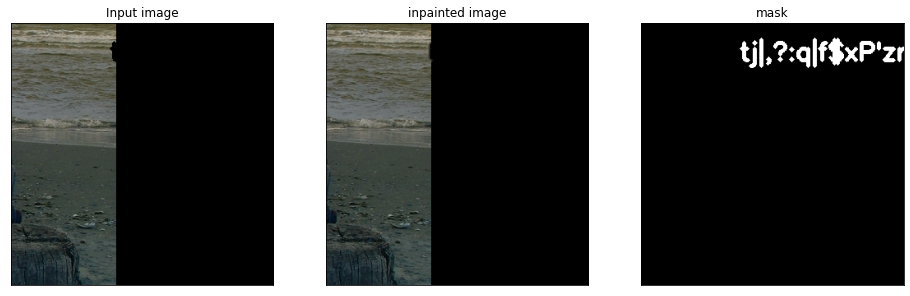

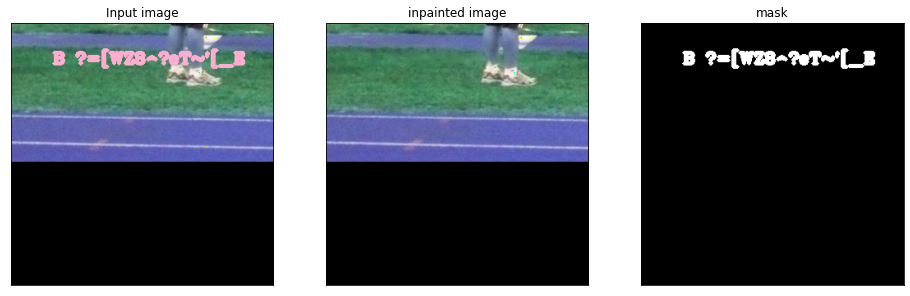

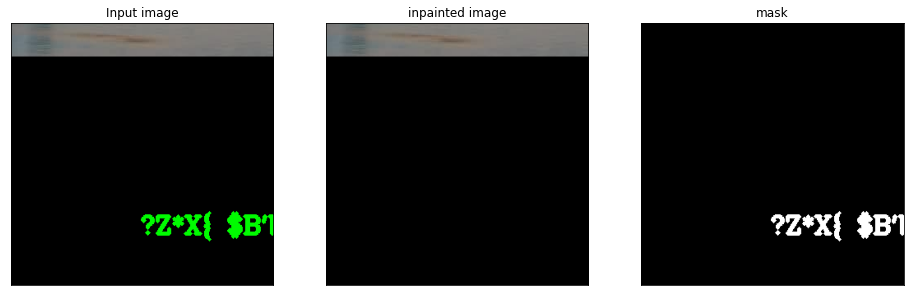

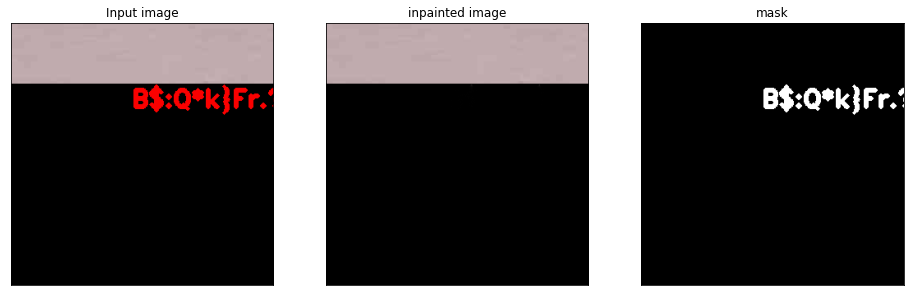

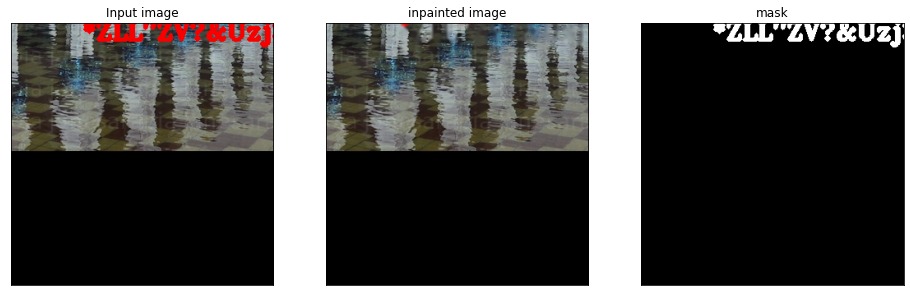

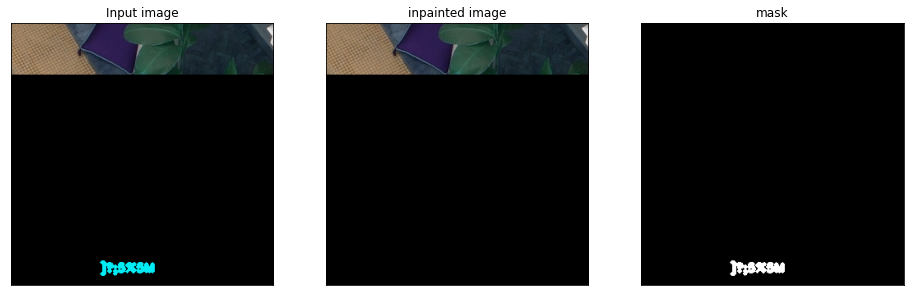

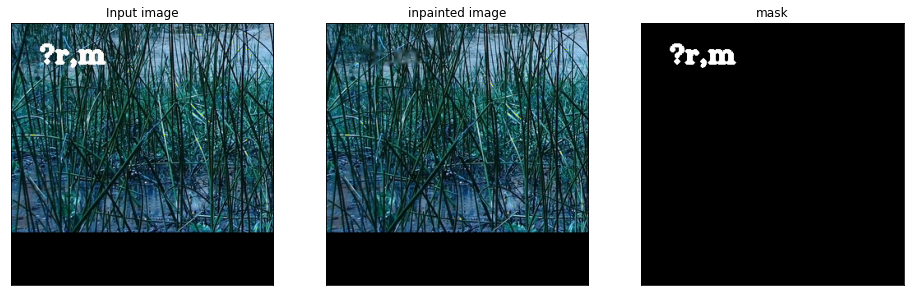

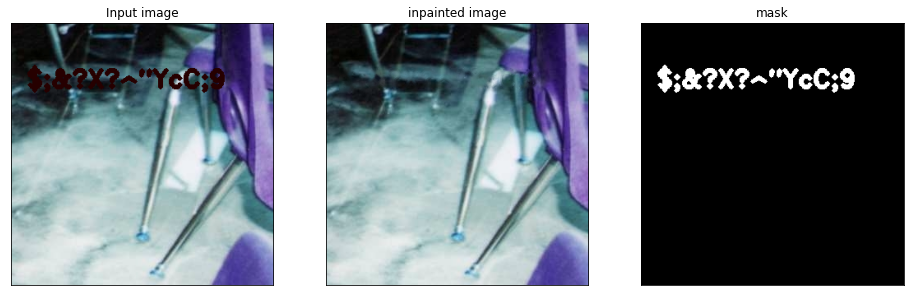

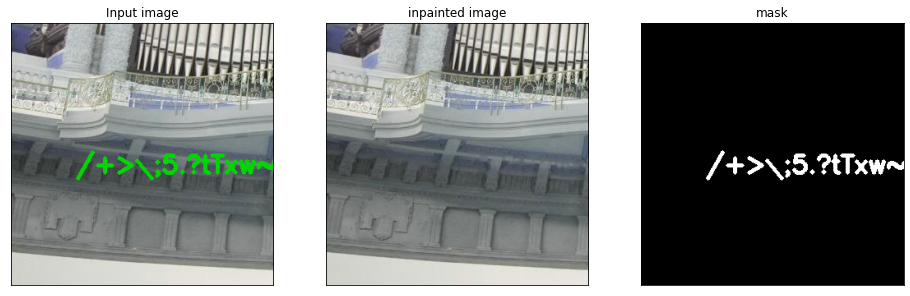

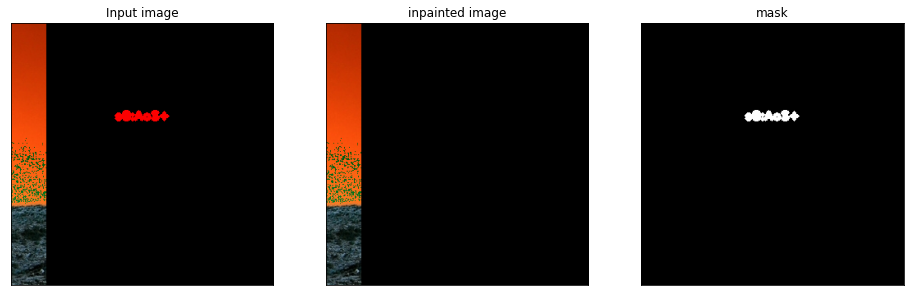

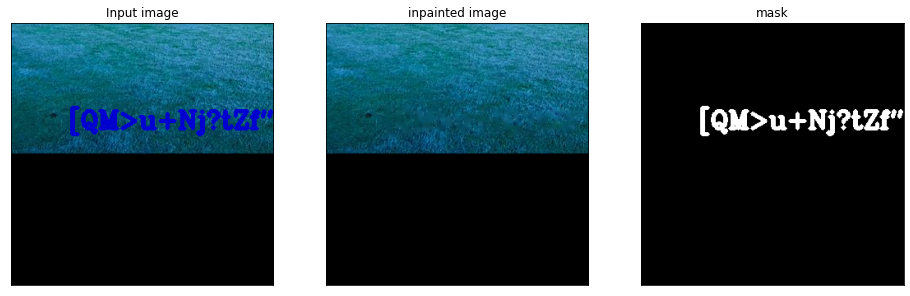

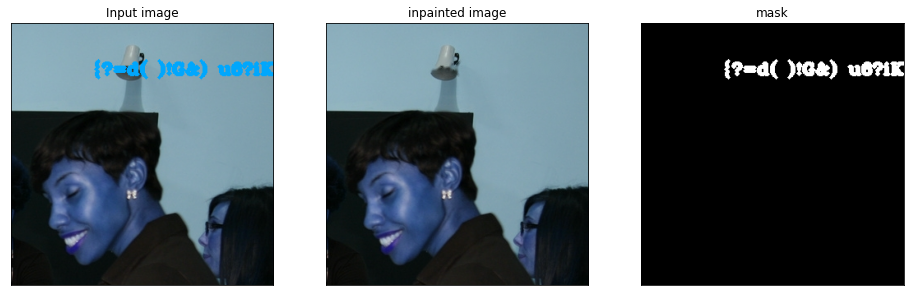

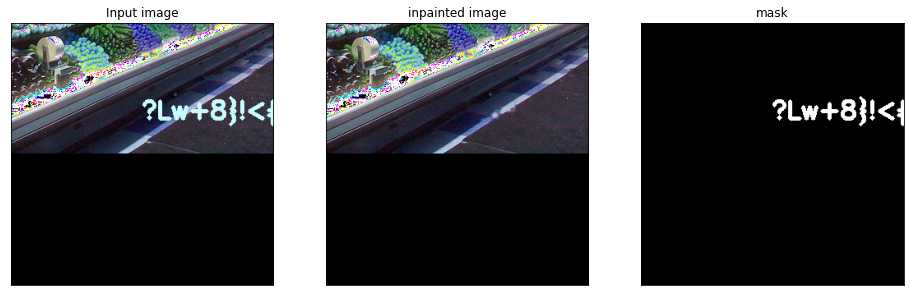

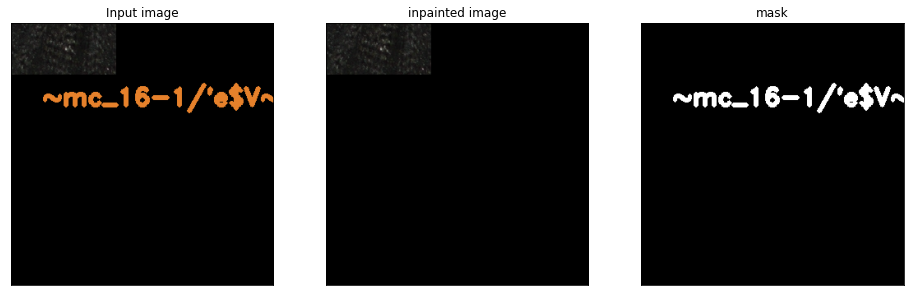

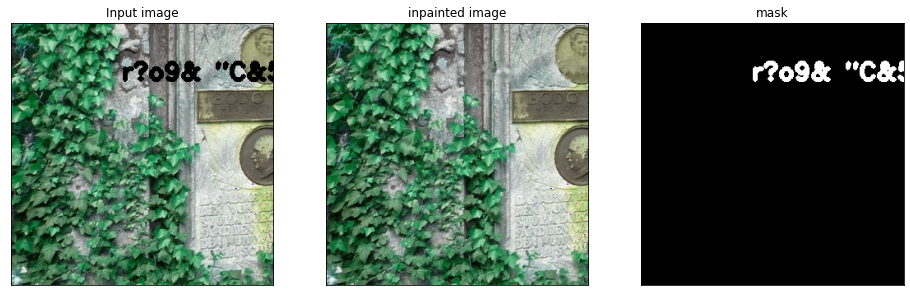

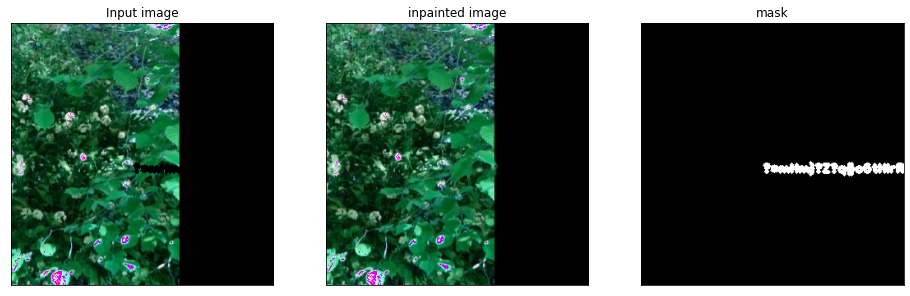

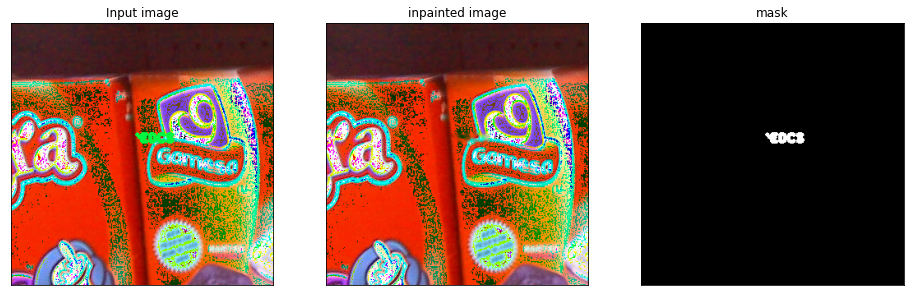

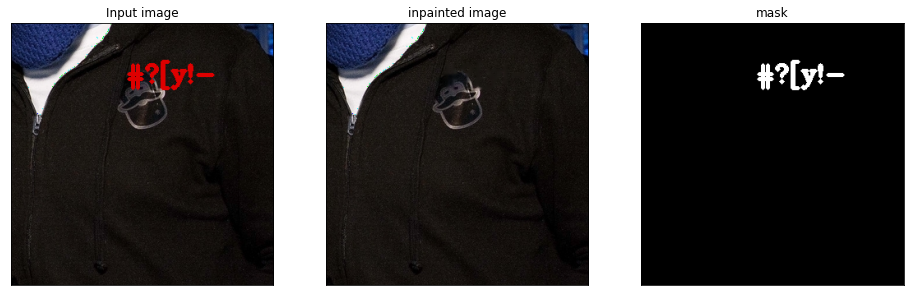

In [28]:
import numpy as np
import cv2 as cv
from torch.utils.data import DataLoader
from generate_training_validation_data import CustomImageDataset
import matplotlib.pyplot as plt


train_data_dir = 'D:/MemeMachine_ProjectData/dataset/training'
validation_data_dir = 'D:/MemeMachine_ProjectData/dataset/validation'
img_width, img_height, n_channels = 320, 320, 3 

train_dataset = CustomImageDataset(train_data_dir, img_width, img_height)
test_dataset = CustomImageDataset(validation_data_dir, img_width, img_height)

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

for i in range (25):

    # Display image and label
    train_features, train_labels = next(iter(train_dataloader))

    input_image = train_features[0].squeeze()
    input_image = (np.moveaxis(input_image.numpy(), 0, -1)*256).astype(np.uint8)

    label = train_labels[0].reshape((img_width, img_height))
    label[label<=0] = 0
    label[label>0] = 1
    label = label.byte().numpy()


    fig = plt.figure(figsize=(16, 8))
    
    fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
    plt.title("Input image")
    plt.imshow(input_image, cmap="gray")
    
    fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
    plt.title("inpainted image")
    dst = cv.inpaint(input_image,label,3,cv.INPAINT_TELEA)
    plt.imshow(dst, cmap="gray")

    fig.add_subplot(1, 3, 3, xticks=[], yticks=[])
    plt.title("mask")
    plt.imshow(label, cmap='gray')

    fig.savefig("cv2inpainting_telea/image_"+str(i)+".jpg", dpi='figure')